In [40]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


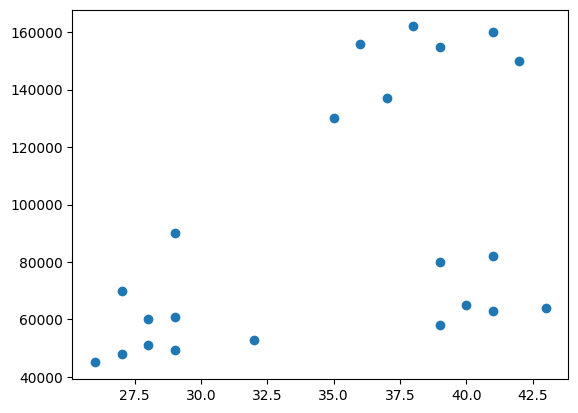

In [64]:
plt.scatter(df["Age"],df["Income($)"])

In [65]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [66]:
y_predicted = km.fit_predict(df.drop("Name",axis=1))


In [68]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


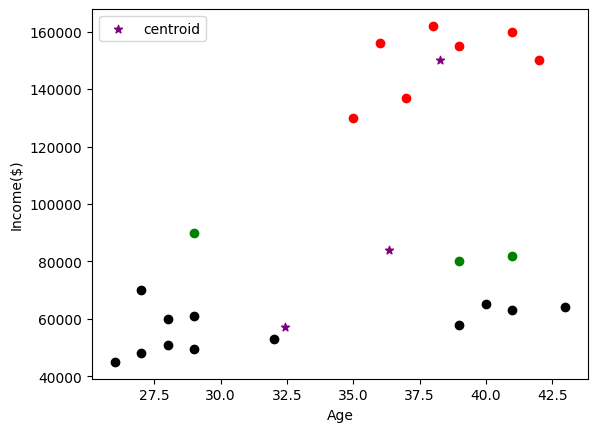

In [69]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]

plt.scatter(df1["Age"],df1["Income($)"],color="green")
plt.scatter(df2["Age"],df2["Income($)"],color="red")
plt.scatter(df3["Age"],df3["Income($)"],color="black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])

scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [73]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [74]:
df["cluster"] = y_predicted

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [76]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

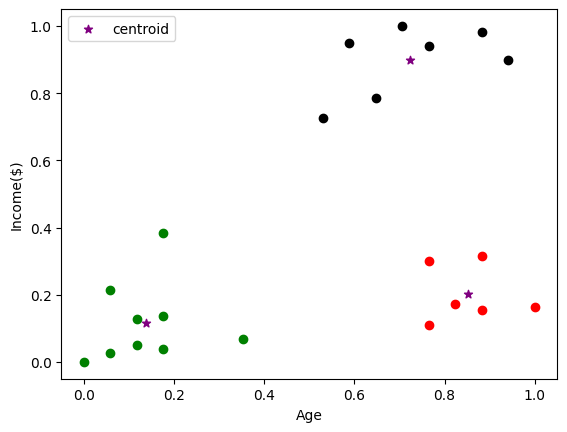

In [77]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]

plt.scatter(df1["Age"],df1["Income($)"],color="green")
plt.scatter(df2["Age"],df2["Income($)"],color="red")
plt.scatter(df3["Age"],df3["Income($)"],color="black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [78]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[["Age","Income($)"]])
  sse.append(km.inertia_)

In [79]:
sse

[5.434011511988176,
 2.345614491472593,
 0.4750783498553095,
 0.3923766528801945,
 0.27558255687229755,
 0.2302234881568274,
 0.20880479683676678,
 0.13265419827245162,
 0.1062989742140513]

Text(0, 0.5, 'SSE')

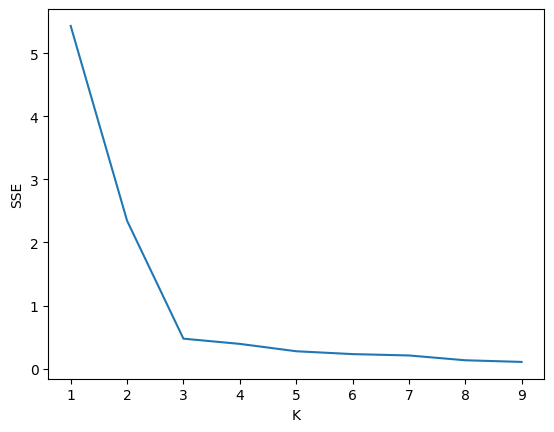

In [80]:
plt.plot(k_rng,sse)
plt.xlabel("K")
plt.ylabel("SSE")